In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: for inline plotting in Jupyter
%matplotlib inline

In [51]:
import pandas as pd

# Load the dataset from the data folder
df = pd.read_csv('data/movies.csv')
print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [52]:
print("Dataset Shape:", df.shape)
print(df.info())
print(df.describe())

Dataset Shape: (7668, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None
              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+0

In [54]:
# Remove rows with missing values and create a copy for safe modifications
df_cleaned = df.dropna().copy()
print(df_cleaned.info())
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB
None
                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1           

In [55]:
df_cleaned.to_csv('data/cleaned_movies.csv', index=False)

In [56]:
import sqlite3

# Connect to a new SQLite database (or create it if not present)
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

# Create a table with appropriate columns (adjust types as needed)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS movies (
        MovieID INTEGER PRIMARY KEY,
        Title TEXT,
        Genre TEXT,
        Rating REAL,
        BoxOfficeRevenue REAL,
        Gross REAL,
        Runtime REAL,
        Score REAL,
        Votes REAL,
        ReleaseYear INTEGER
    )
''')
conn.commit()

In [57]:
# Load the cleaned CSV into the SQL table using pandas
df_cleaned.to_sql('movies', conn, if_exists='replace', index=False)

5421

In [58]:
query = """
SELECT Genre, AVG(Rating) as AvgRating
FROM movies
GROUP BY Genre
ORDER BY AvgRating DESC;
"""
avg_rating_by_genre = pd.read_sql_query(query, conn)
print(avg_rating_by_genre)

        genre  AvgRating
0     Western        0.0
1    Thriller        0.0
2      Sci-Fi        0.0
3     Romance        0.0
4     Mystery        0.0
5      Horror        0.0
6     Fantasy        0.0
7      Family        0.0
8       Drama        0.0
9       Crime        0.0
10     Comedy        0.0
11  Biography        0.0
12  Animation        0.0
13  Adventure        0.0
14     Action        0.0


In [59]:
conn.close()

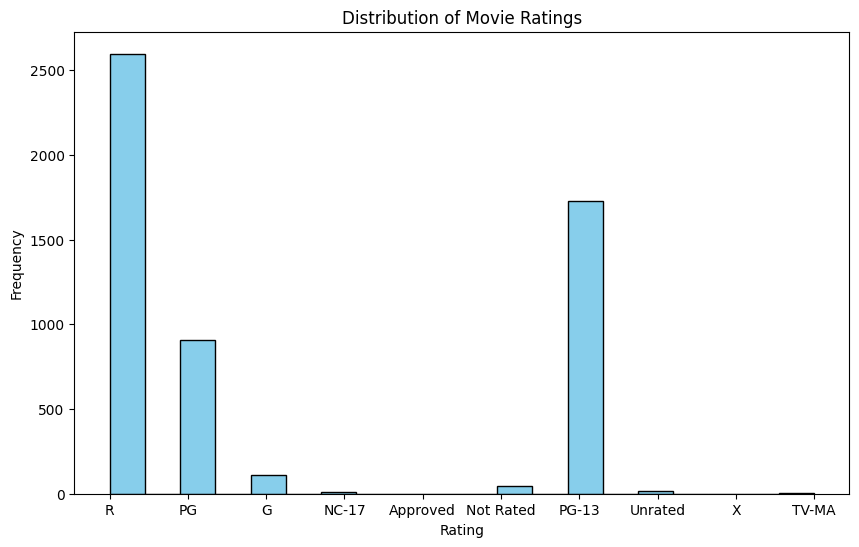

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_cleaned['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

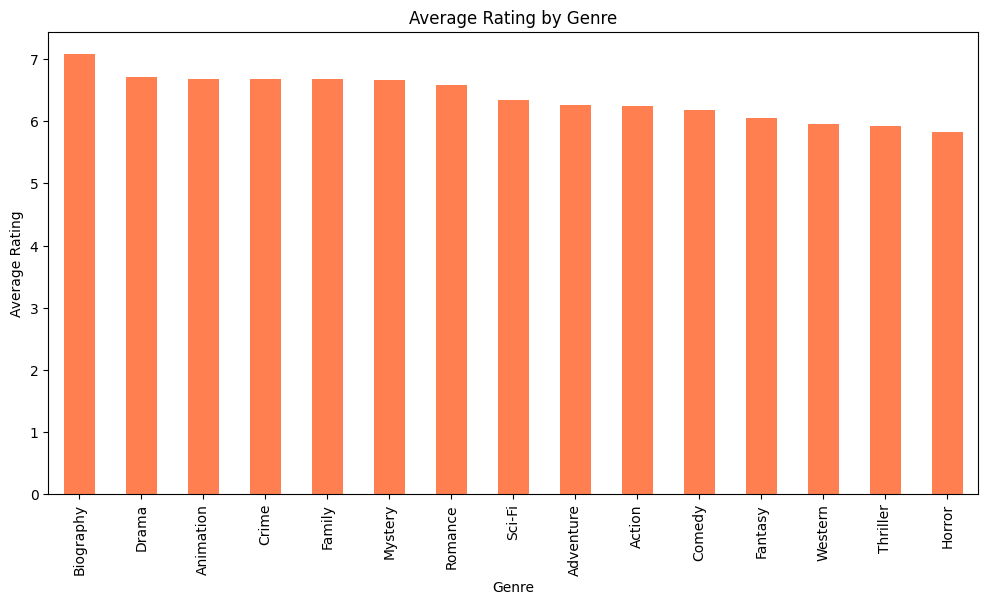

In [68]:
genre_rating = df_cleaned.groupby('genre')['score'].mean().sort_values(ascending=False)
genre_rating.plot(kind='bar', figsize=(12,6), color='coral')
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

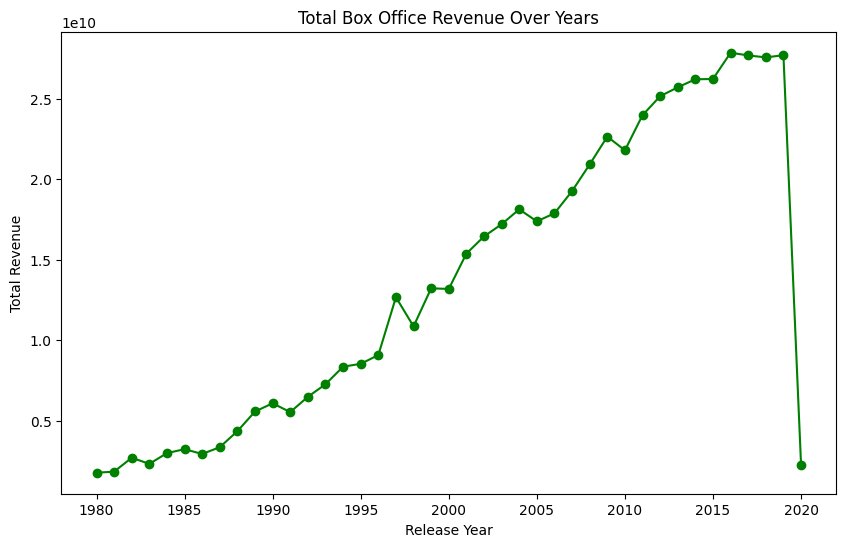

In [70]:
revenue_trend = df_cleaned.groupby('year')['gross'].sum()
revenue_trend.plot(kind='line', figsize=(10,6), marker='o', color='green')
plt.title("Total Box Office Revenue Over Years")
plt.xlabel("Release Year")
plt.ylabel("Total Revenue")
plt.show()